# Model Notebook

 This is the notebook for model age and gender detection Here we will extract the data, train it and fit itinto our model,and will evaluate our result and optimize the model for better results.

# Import the necessary Liabraries

In [63]:
import numpy as np
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta,Adamax,RMSprop
import warnings
warnings.filterwarnings("ignore") 



## Extract Data from the dataset

In [2]:
fldr=r"C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace"

In [3]:
import os
flies=os.listdir(fldr)


## Create List of images from the dataset

In [4]:
ages =[]
genders =[]
images=[]
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
C:\Users\sandi\Deskto

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_0_4_20170103200409638.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_0_4_20170103200443015.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_0_4_20170103200501766.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_0_4_20170103201924664.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_0_4_20170103202338152.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_0_4_20170103212521420.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_0_4_20170103223451479.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_0_4_20170104010810728.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_1_0_20161220222001459.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_1_0_20170103175323250.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/10_1_0_20170103200654246.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_0_0_20170110225327724.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_0_0_20170110225435539.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_0_0_20170110225459361.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_0_0_20170110232511893.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_0_1_20170103201136230.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_0_2_20170103200847287.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_0_3_20170104013250186.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_0_3_20170104230222352.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_0_4_20170103200621488.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_1_0_20170103200517422.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/11_1_0_20170109203319557.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170103200944175.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170104005520631.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170104005712405.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170104012017177.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170104013219930.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170104013410523.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170109193530060.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170109200852145.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170109200904988.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170109200926532.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/12_1_0_20170109201114375.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110224337867.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110224531616.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110224625011.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110224745977.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110224751365.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110224801290.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110225045970.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110225059227.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110225302179.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110225307195.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/13_0_0_20170110225428740.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_0_20170116211955846.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_0_20170116222402683.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_0_20170117150204180.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_0_20170120133332421.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_1_20170104012054585.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_1_20170110232707718.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_1_20170113145153262.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_1_20170113151234215.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_1_20170116205529704.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_1_20170117133924867.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_0_1_20170117141604244.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_2_20170109204853921.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_3_20161220220655004.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_3_20170104013523266.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_3_20170104221658783.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_3_20170104221756497.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_3_20170104221807127.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_3_20170104221818294.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_3_20170104221901782.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_3_20170104222437734.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_3_20170104222504560.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/14_1_4_20170103200753206.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109203912357.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109204142217.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109204150999.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109204203014.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109204210842.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109204237329.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109204314585.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109204354264.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109204416506.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109212807412.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/15_1_0_20170109213421667.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110225708208.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110225715009.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110231215944.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110231218369.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110231219975.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110231221050.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110231230149.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110231517869.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110231520320.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110231521377.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170110231526097.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170116235030195.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170117134536197.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170117134538670.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_0_20170120133327900.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_1_20170105183511375.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_1_20170110231713914.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_1_20170110231925176.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_1_20170113152759697.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_1_20170113155247627.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_1_20170116161243731.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_0_1_20170116200802213.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_0_20170119155149354.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_1_20170109212835445.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_1_20170109213003514.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_1_20170109214053896.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_1_20170109214212884.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_1_20170112191148791.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_1_20170112191246585.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_1_20170112230648917.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_1_20170114025506835.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_1_20170114025512971.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/16_1_1_20170114025520014.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_1_20170117183520064.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_2_20170105183230223.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_2_20170105183335071.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_3_20161219224759672.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_3_20170104225543888.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_3_20170104225710543.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_3_20170104225734512.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_3_20170104225736449.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_3_20170104230447112.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_3_20170117134709342.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_0_3_20170117152534037.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/17_1_4_20170117193142374.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_0_0_20170103201308008.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_0_0_20170103201519511.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_0_0_20170105183259439.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_0_0_20170110223927225.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_0_0_20170110231228322.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_0_0_20170110231524976.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_0_0_20170110231625906.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_0_0_20170110231644037.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_0_0_20170110231703804.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_0_0_20170110231723682.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212826322.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212828069.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212830216.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212847067.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212849263.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212905543.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212906609.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212908376.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212914272.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212921724.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_0_20170109212936696.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170113002913732.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170113005132350.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170113005321501.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170114030232014.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170114030253404.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170114030258171.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170114030334837.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170114030339628.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170114030424059.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170116000609057.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/18_1_1_20170116164854853.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170103201450359.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170103201503695.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170103201508633.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170103201755639.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170103201812887.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170104011946801.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170104012012331.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170105183247775.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170105183441000.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170105184107718.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/19_1_0_20170109193136416.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20161219225850912.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20161220201355210.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20161220220135250.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20161220220239129.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20161220223221043.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20170103210032258.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20170103210415090.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20170103210548852.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20170103210741492.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20170103210905939.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_0_20170109191105641.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_1_20170110213649083.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_1_20170110213656556.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_1_20170110213700642.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_1_20170110213701704.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_1_20170110213707879.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_1_20170110213808936.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_1_20170110213810856.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_1_20170112211228948.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_1_20170117130048013.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219140525218.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219140530307.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162212662.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162427318.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162431598.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162433846.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162514182.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162518471.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162544751.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162626830.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162649582.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162719255.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219162726231.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219204858548.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219204951309.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219204958037.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219205016902.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219205107772.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219205111061.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219205225773.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219205313061.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219205318388.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219205548949.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_2_20161219205702141.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219224917304.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219224939056.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219224941016.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219224942305.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219224956400.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219225012529.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219225021361.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219225032897.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219225116535.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219225121728.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161219225149888.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220220418690.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220220508802.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220220529033.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220220544050.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220220606705.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220220910514.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220221612859.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220221616882.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220221723490.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220222436891.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_0_3_20161220222441595.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219201307075.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219201324636.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219202919508.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219203021180.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219203420685.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219204130316.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219204702517.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219204717605.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219204750596.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219205022813.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20161219205428229.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193026103.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193120893.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193401456.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193407724.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193408973.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193427612.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193455503.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193704430.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193717283.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193726686.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_0_20170109193830378.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219162415934.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219162419463.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219162523262.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219162635831.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219162730478.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219162843079.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219190719971.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219190745330.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219192240930.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219192458643.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161219193320219.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161220220018380.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20161221192810669.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20170109190752762.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20170109193557242.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20170109193844660.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20170109194007910.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_2_20170117192827229.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_3_20161219224454728.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_3_20161219224457585.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_3_20161219224458872.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_3_20161219224539488.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_3_20161220221800802.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_3_20161220221808354.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_3_20161220222128210.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_3_20161220222647563.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_4_20161221192615380.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_4_20161221192629892.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_4_20161221192658892.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_4_20161221192800604.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_4_20161221192830036.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_4_20161221192832972.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/1_1_4_20161221192836205.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117003449983.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117005807799.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117114905086.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117134042772.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117134052589.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117134213422.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117134248038.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117134631710.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117135525494.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117140056058.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_0_0_20170117140133828.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170109212842300.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170109212911927.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170109213016635.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170109213411083.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170109213459975.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170109214040024.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170109214125992.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170109214618635.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170112231826743.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170113005610158.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_0_20170114031424981.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_2_20170116163800040.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_2_20170116163810477.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_2_20170116165621526.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_2_20170116170350603.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_2_20170116170358089.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_2_20170116170359820.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_2_20170116182714846.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_2_20170116194052786.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_2_20170117141237688.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_3_20170104222019511.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/20_1_3_20170104222021392.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170113133115864.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170113133117587.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170113133118839.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170113133205762.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170113133218153.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170113145729669.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170113180920187.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170113195431788.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170114030009371.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170114031536421.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_0_1_20170114032016183.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170109213135260.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170109213908912.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170109214656355.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170111182452742.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170112233431458.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170112233433959.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170112233608086.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170112233610183.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170114032157249.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170116205856338.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_0_20170116214341701.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170104015820531.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170104015832388.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170104020048292.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170104020235605.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170104021056028.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170104021952837.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170105000725292.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170105002530429.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170105183505385.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170109132112364.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_2_20170109213056053.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103223150726.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103223204087.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103223208902.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103223234959.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103223237335.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103223240255.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103223244111.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103223249191.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103223253239.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103223636607.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/21_1_4_20170103224431735.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_1_20170114032119562.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_1_20170114032251671.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_1_20170114033114683.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_1_20170114033132392.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_1_20170114033134437.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_1_20170114033210195.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_1_20170114033213586.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_1_20170116144518064.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_1_20170116214330918.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_1_20170117020724763.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_0_2_20170104015701971.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170116220644040.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170116220646631.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170116220816105.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170116220932996.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170116220934918.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170116220936851.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170116220938702.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170116220950381.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170117133125316.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170117141120129.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_0_20170117141131710.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116162944219.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116164534125.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116165023471.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116165351984.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116165447905.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116165605354.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116165942740.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116170405273.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116172023018.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116172028415.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_2_20170116172030701.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20161221195925096.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20161223225936076.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20170103180220911.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20170103212717246.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20170103223002341.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20170103223042983.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20170103223216583.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20170103223330567.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20170103223351703.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20170103223356448.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/22_1_4_20170103223405215.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_1_20170115231442487.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_1_20170116010954423.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_1_20170117012400519.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_1_20170117144346825.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_1_20170117164527169.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_1_20170117194030006.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_1_20170117194052028.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_1_20170117194105675.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_1_20170120133824503.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_2_20170107213747034.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_0_2_20170108224712804.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170111182452759.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170112234027666.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170112234124928.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170112234126720.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170112234128328.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170112234202903.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170112234220808.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170112234244982.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170112234310143.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170112234313416.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_0_20170112234315344.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172757270.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172803446.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172812034.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172814255.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172816125.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172817773.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172830806.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172838237.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172843453.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172848833.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_2_20170116172850931.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164424022.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164425613.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164432343.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164456070.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164457312.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164458614.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164501885.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164502773.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164504597.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164507828.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/23_1_3_20170119164509213.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170116221926893.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170116222146786.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170116222408305.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170116224743469.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170117003314278.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170117091201342.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170117135702616.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170117140958984.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170117143518024.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170117145203051.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_0_20170117145303338.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_1_20170117194748068.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_1_20170117204434040.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_1_20170117204443327.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_1_20170120133915911.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_2_20161219190613907.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_2_20161219192221394.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_2_20161219192432539.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_2_20170103223924087.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_2_20170104015809173.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_2_20170104020029454.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_2_20170104020102786.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_3_20170120133910528.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_3_20170120133949638.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_4_20161219192105922.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_4_20170102233500506.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_4_20170103210052027.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_4_20170103210118506.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_4_20170103223915799.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_4_20170103223928055.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_4_20170103224944762.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_4_20170103234945243.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_0_4_20170103234950908.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222200924.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222405565.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222419515.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222429652.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222618238.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222626783.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222759439.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222814643.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222827257.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222832772.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_0_20170116222842089.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170112234558855.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170112234600841.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170112234612457.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170113000048018.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170113001329123.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170113001636241.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170113003543637.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170113003752421.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170113005327119.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170113011154152.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_1_20170113011157712.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116164559724.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116164628750.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116164744956.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116164813386.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116165003935.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116165051346.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116165105160.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116165442037.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116165445234.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116165506261.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116165511429.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116173727786.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116174400891.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116174403364.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116174405212.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116174406776.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116174408274.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116174409602.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116174411079.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116174412618.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116174413898.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_2_20170116174415218.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170109132534202.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170116220136183.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170116220311270.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170117145425107.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170117145441075.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170117145444188.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170117145624635.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170117145627980.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170117150120578.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170117150307141.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_3_20170117150320420.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170116220449622.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170116222729168.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170117010442715.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170117145459404.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170117150332484.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170117150458348.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170117150521764.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170117150615516.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170117150618462.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170117150622299.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/24_1_4_20170117150624909.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117143411179.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117143430849.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117143439000.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117143507210.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117143546538.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117144403034.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117144604250.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117151036947.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117151532082.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117151628052.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_0_20170117151643003.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_1_20170117012445920.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_1_20170117140732133.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_1_20170117164554362.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_1_20170117165420219.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_1_20170117183525355.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_1_20170117190559108.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_1_20170117195010460.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_1_20170117195045410.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_1_20170117195050698.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_1_20170117195252189.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_2_20161219193843611.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_3_20170119171837104.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_3_20170119171838017.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_3_20170119171838936.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_3_20170119171900192.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_3_20170119171953195.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_3_20170119171959592.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_3_20170119212123817.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_4_20170103230228713.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_4_20170103233741427.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_4_20170103235109805.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_0_4_20170103235145124.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170116223859777.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170116223905448.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170117123818139.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170117134324860.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170117134403373.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170117134530533.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170117134837758.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170117134947430.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170117135211463.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170117135646592.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_0_20170117135959687.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170112235103240.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170112235144082.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170113001625270.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170113001941650.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170113005424686.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170113011500969.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170113011522470.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170113011541030.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170113011606928.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170113180645637.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_1_20170113183706142.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116174831551.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116174834599.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116174838291.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116174845535.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116174847586.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116174850070.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116174852261.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116175124189.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116175126325.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116175148849.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_2_20170116175222886.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119153501863.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119153526538.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119154344723.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119155132282.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119163748638.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119164527886.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119171154440.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119171206287.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119171211913.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119171512535.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/25_1_3_20170119171906505.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170105162452859.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170105162648388.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170105163435235.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170105164133579.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170105183712607.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170108235818665.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170112205758123.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170112205800959.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170113133551354.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170113134718713.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170113135244994.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116224849492.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116224921695.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116224934139.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116225120267.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116225130512.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116232418087.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116232422006.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116232619054.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116232725357.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116232936514.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170116233047853.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117173437732.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117173443951.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117173447156.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117173510724.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117184723591.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117195426941.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117195441085.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117195443924.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117195446239.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117195448787.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_0_20170117195452420.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135238738.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135240994.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135255058.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135256601.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135301873.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135304305.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135316041.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135322642.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135339953.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135342690.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170113135416706.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116143035440.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116143037391.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116143057934.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116153040656.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116181040400.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116181113305.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116182114342.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116182126537.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116182128259.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116182136243.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170116182254548.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117171618235.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117172711486.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117173148204.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117173231271.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117173502013.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117194404976.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117195155997.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117195438339.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117195559692.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_1_20170117195659949.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116181321059.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116181322065.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116181343246.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116181346232.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116181352905.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116181353748.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116181354956.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116181409076.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116182237706.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116182240440.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_2_20170116182347867.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117153628556.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117153919644.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117153922501.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117153930604.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117154224766.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117154317645.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117154449286.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117154452224.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117154454487.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117154502598.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170117154505758.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181050580.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181200723.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181258652.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181302068.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181310597.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181315374.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181349862.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181350932.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181351882.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181411076.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_3_20170119181428332.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170116192510762.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170116193007097.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170117152317187.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170117152500051.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170117152521052.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170117152714787.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170117152744875.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170117152758143.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170117152801765.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170117153015117.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_0_4_20170117153017629.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170112203844509.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170112213001988.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170112231759374.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170112234157545.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170112235918563.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170113000016345.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170113000527784.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170113001451463.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170113001701275.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170113012122280.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170113180707130.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117091743194.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117091820820.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117091834220.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117094729864.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117094755094.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117103606667.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117105735230.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117105747119.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117131041963.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117144831027.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117152442875.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117201638206.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117201640750.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117201642542.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117201757542.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117201814973.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117201904253.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117201918694.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117201924879.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117201944942.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117201947511.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_0_20170117202010288.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113000455266.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113000509698.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113000552163.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113000644330.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113000646211.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113000647442.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113000649129.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113000655059.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113000717466.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113000749634.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170113001517730.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116154712959.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116154716047.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116154727986.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116155039588.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116155754189.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116155758186.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116155801198.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116155804560.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116155807484.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116160229813.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116160247500.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116231925419.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116231926819.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116231937264.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116232156210.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116232158064.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116232255273.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116232324000.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116232325361.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116232329337.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116232330694.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_1_20170116232349861.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170104022817638.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170104022829221.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170104022833734.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170105161510388.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170105163925349.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170105163951372.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170105164540403.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170109002645487.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170109002657161.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170109012525167.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170109213532617.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180538949.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180541533.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180543835.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180548534.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180655987.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180658254.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180722613.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180753524.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180824329.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180828579.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116180854138.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184528621.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184530259.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184537798.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184543342.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184553462.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184624186.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184626759.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184636519.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184639426.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184651548.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_2_20170116184655060.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170104235435739.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170109133009799.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170109133014151.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170109133227729.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170109133424931.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170109134328289.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170109134452703.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170109134510359.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170109134536902.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170109135843276.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119163659157.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119180229629.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119180415252.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119180502866.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119180533644.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119180539188.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119180544051.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119180550463.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119180600308.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119180605476.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119180813956.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193144786.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193145481.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193146097.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193146682.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193147306.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193147891.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193148570.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193149338.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193149977.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193150571.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_3_20170119193151218.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201509118.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201548014.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201612869.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201617637.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201620471.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201645720.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201650134.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201736159.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201852933.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201855518.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/26_1_4_20170117201912672.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_0_20170117202125551.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_0_20170117202216127.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_0_20170119145326086.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_0_20170119150234550.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_0_20170119193202931.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_0_20170120220108816.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_1_20170102233552626.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_1_20170104181441861.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_1_20170105164603540.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_1_20170113000907378.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_1_20170113133215272.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170104011250152.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170104192852607.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170105161443219.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170105163325547.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170112193056503.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170116161853757.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170116161902902.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170116161920941.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170116162359452.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170116163655761.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_2_20170116165157609.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170103235800445.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170104002159117.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170104011307960.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170104194349352.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170105163841596.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170113133316808.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170113134023216.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170117010740316.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170117010754780.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170117012822305.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_0_4_20170117120137595.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_0_20170119194402442.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_1_20170103182202481.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_1_20170109131744869.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_1_20170109212658510.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_1_20170112193026590.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_1_20170112203947771.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_1_20170112213507183.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_1_20170112213510151.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_1_20170112213529269.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_1_20170112213535591.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_1_20170112213549597.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163601765.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163607756.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163611289.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163614840.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163618474.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163622032.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163625314.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163645443.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163651888.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163658895.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_2_20170116163705155.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170117175954467.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170117175958932.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170117180001178.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170117180032189.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170117183509909.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170117191505796.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170119144021952.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170119145528477.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170119153535105.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170119155424633.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/27_1_3_20170119155634673.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117020857776.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117021206167.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117021400330.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117021411463.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117021818299.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117120226377.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117120705693.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117120854505.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117120912350.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117120914517.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_0_20170117120915648.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113134701210.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113134755546.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113135703082.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113141507985.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113141527026.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113141915947.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113142237196.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113142308413.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113142348356.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113142355492.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170113142405196.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020124788.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020126509.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020144774.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020349205.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020416787.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020634195.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020644358.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020658579.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020659979.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020752716.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_1_20170117020909688.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170117121559306.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170117144207130.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170117180210549.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170117180213062.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170117180432854.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170119144359718.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170119162759516.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170119162805164.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170119163006483.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170119164001559.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_3_20170119164109405.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170105163451675.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170105163707258.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170105183852672.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170109002923202.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170109002937845.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170109140345949.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170113150805663.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170116002326539.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170116182445736.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170116183505479.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_0_4_20170116210338902.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117121929252.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117122001989.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117122002945.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117122004211.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117122005148.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117122006023.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117122007101.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117122007867.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117122008648.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117122009585.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_0_20170117122010726.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116023923708.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116024015361.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116152550099.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116164109844.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116164405234.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116164832811.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116170856613.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116171225686.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116171301974.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116175812597.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_1_20170116180035164.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164552683.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164556009.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164602956.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164612760.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164621666.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164637415.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164640416.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164649902.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164653714.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164703724.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_2_20170116164716297.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170117144207130.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170117180631161.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170117180646529.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170117180649497.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170117183503510.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170117184127794.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170117184807423.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170119144214613.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170119152713848.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170119154512882.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/28_1_3_20170119164514645.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170114033106398.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170116024240065.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170116164921650.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170116182424711.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170116190029257.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170116192103987.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170116192401102.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170116205219294.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170116214245025.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170116214300022.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_0_20170116214417558.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170114030901209.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170114034635292.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170115235536036.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170116001349353.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170116002244586.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170116002932698.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170116010112917.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170116011143078.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170116025852455.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170116142845616.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_1_20170116182134769.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170117180741530.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170117180744344.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170117180746585.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170117180751226.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170117180817266.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170117180819737.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170119152247249.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170119153035762.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170119164049077.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170119164635285.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_0_3_20170119165447462.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170105002624350.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170105163239939.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170105165153564.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170105172818813.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170109002758865.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170109010152767.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170109132341425.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170109134017138.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170109134431956.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170111182452813.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_0_20170112235530689.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170115234825058.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170115235003672.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170115235359510.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170115235932970.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170116000522670.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170116001305894.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170116001830007.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170116002146102.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170116003342475.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170116003347103.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_1_20170116003411532.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_2_20170116192021943.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_2_20170116192058227.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_2_20170116192410313.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_2_20170116192543424.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_2_20170116220847352.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_2_20170116220903106.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_2_20170116223039250.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_3_20170103214234261.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_3_20170104214540068.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_3_20170104222730103.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/29_1_3_20170104223010439.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_0_20170110213639642.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_0_20170110213705227.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_0_20170110224316546.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_0_20170110224730142.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_0_20170110225218837.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_0_20170110225322822.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_0_20170117192756285.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_1_20170110205407227.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_1_20170110213401217.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_1_20170110213721101.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_1_20170110213724790.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219212235749.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219212329726.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219212403166.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219221701671.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219221937375.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219222109319.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219222111287.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219222203111.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219222215999.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219222236983.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_0_2_20161219222714623.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109191715669.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109191720148.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109191752762.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109191758501.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109191803520.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109191841423.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109192428145.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109192459049.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109193339281.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109193728905.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_0_20170109193848145.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219203903148.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219204046924.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219204458116.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219205100213.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219211114077.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219211123885.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219211133165.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219211255317.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219211300054.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219211617551.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_2_20161219211625838.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221201556929.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221201717930.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221201820529.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221202110987.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221202222280.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221202224681.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221202243153.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221202353640.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221202408818.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221202425393.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/2_1_4_20161221202428169.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117130654291.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117130933486.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117131016260.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117131018041.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117131024540.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117131025845.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117132538273.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117132539923.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117134548302.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117135548182.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_0_20170117135807720.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113134204447.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113134217498.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113141654362.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113141818644.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113141819444.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113141822196.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113141843699.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113141846612.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113151342687.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113152824163.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_1_20170113155013364.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116180136075.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116180745378.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116181218736.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116181351185.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116191231876.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116192359839.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116192556571.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116192711273.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116192739617.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116193341533.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_0_2_20170116193441821.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170103182413737.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170103182425185.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170103182948122.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170103183908075.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170104164947017.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170104165043953.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170104165921257.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170104170158777.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170104184950950.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170104185111694.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170104185704638.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117170803122.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117170934860.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117171117386.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117171346533.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117171606522.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117174710486.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117174824936.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117181115699.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117181122764.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117181332132.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_0_20170117181335004.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170104021318733.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170104021619821.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170104022925822.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170104164904841.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170104192931704.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170105002521620.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170105161432042.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170105162719051.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170105170141222.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170108234540565.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_2_20170116161303257.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170104232927250.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170104235219219.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170104235527578.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170104235542236.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170104235553643.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170109132828919.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170109134035009.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170109134515826.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170109141047511.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170109141058153.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/30_1_3_20170116185958458.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117131124063.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117133142224.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117133148137.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117135213674.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117135307744.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117153916924.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117172435086.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117175719891.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117181551404.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117181559819.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_0_20170117181758364.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170104165548728.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170104204851228.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170104214647533.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170104220255896.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170104230610969.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170104230731169.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170104231444482.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170104232355440.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170104232701442.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170117181555388.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_0_3_20170119160307619.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170113011230351.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170113012024246.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170113012335025.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170113012712161.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170113012714175.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170114031015215.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170114031519531.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170114031659379.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170115234845837.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170116001235141.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_1_20170116002105934.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_4_20170104165129944.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_4_20170104165850314.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_4_20170112235052769.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_4_20170112235504601.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_4_20170117203017127.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_4_20170117203039631.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_4_20170117203041312.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_4_20170117203047078.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_4_20170117203051199.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/31_1_4_20170117203052559.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170103182544874.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117140807934.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117154734499.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117172942268.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117173203012.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117173304428.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117175908028.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117182234772.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117182301037.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117182315092.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117182320245.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_0_20170117182402092.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117135943245.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117140220148.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117140225687.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117140227057.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117140342322.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117140609238.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117140659728.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117140748207.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117140805502.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117165107803.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_1_20170117172950046.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200337060.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200338100.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200338892.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200339548.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200340188.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200348476.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200350043.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200350788.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200351460.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200400215.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_0_3_20170119200401517.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170116220919526.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170116221727711.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170116221804392.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170116222131069.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170116222855361.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170116222912224.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170117001041422.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170117022346459.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170117091929838.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170117092300323.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_0_20170117093112387.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113001559035.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113002108866.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113005606791.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113010326142.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113011313056.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113011600858.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113011625824.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113011729264.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113011927992.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113012217433.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_1_20170113012612272.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116175135519.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116180211518.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116180409929.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116180734484.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116181306891.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116182247033.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116182311157.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116184058376.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116184323930.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116185951847.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/32_1_2_20170116190009032.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_0_20170120221754125.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_0_20170120225727019.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_1_20170113001600274.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_1_20170113134141083.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_1_20170113135311186.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_1_20170113152629721.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_1_20170113173629148.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_1_20170114034227427.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_1_20170116192517064.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_1_20170116215201422.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_0_1_20170117173931669.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_1_20170117173927950.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_2_20170104022342934.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_2_20170104022951446.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_2_20170116191634811.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_3_20170104223525079.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_3_20170104232111402.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_3_20170104232231283.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_3_20170104235051234.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_3_20170104235523490.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_3_20170109132139583.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/33_1_3_20170109133043550.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_0_20170117203207119.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_0_20170117203213479.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_0_20170117203227887.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_0_20170119151435927.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_0_20170119171632720.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_0_20170119180157900.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_0_20170119180649883.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_0_20170119200555732.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_0_20170119200810940.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_1_20170104173008466.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_1_20170112213542279.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119165336734.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119165359030.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119165709773.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119165755400.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119165802654.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119165834583.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119165846359.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119171236256.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119171311776.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119171609737.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_0_3_20170119171624184.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170113001304724.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170115235719543.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170116000626046.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170116003510683.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170116160755190.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170116172016963.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170116180053899.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170116222753074.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170116231315257.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170117134930254.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_0_20170117134931832.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_2_20170116193448303.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_3_20170104220713478.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_3_20170104235039092.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_3_20170104235537715.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_3_20170104235729572.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_3_20170105000852573.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_3_20170105001226421.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_3_20170105002136348.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_3_20170109141950796.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_3_20170119152405425.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/34_1_3_20170119152656528.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117120128098.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117120442763.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117120747082.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117120948071.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117121643525.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117121726176.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117122020502.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117123744051.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117125815720.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117130045470.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117130116812.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117180552033.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117180601456.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117180618449.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117180735041.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117182852603.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117182859549.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117182945085.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117182947982.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117183000621.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117183005428.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_0_20170117183007140.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170113183259413.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170113184041966.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170113185408776.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170113185501169.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170113190521337.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170113195625995.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170114034617407.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170115235553533.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170116002219767.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170116002407914.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_1_20170116003600500.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116164423714.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116164723099.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116165347849.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116172822574.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116172921158.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116172936477.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116172939892.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116172943457.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116173616956.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116173641544.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_2_20170116173652735.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119180425940.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119181105779.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119181247523.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119181325084.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119183157029.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119183709500.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119191827257.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119191930010.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119194712751.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119194907323.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_0_3_20170119200913517.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170104181325301.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170104192826910.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170104201705201.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170105162234814.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170105162344803.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170105162358962.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170105162559851.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170105165053628.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170105172544509.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170105172551789.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170105173525804.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117185820075.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117190350409.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117190509274.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117190625474.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117191336914.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117191417058.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117191520420.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117191606659.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117191616924.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117191955709.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_0_20170117192047033.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117135248701.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117135357361.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117141052934.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117142925468.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117151422756.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117154025584.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117154027218.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117154114285.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117154115861.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117154134322.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_1_20170117154137390.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_3_20170119162657708.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_3_20170119163902152.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_3_20170119201055428.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_3_20170119201519805.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_3_20170119201541494.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_3_20170119201542462.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_3_20170119201543070.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_4_20170104181328997.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_4_20170109003348401.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_4_20170113182827279.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/35_1_4_20170116221035151.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117171650744.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117175602121.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117175609824.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117181825165.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117181844189.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117181851709.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117181904618.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117182627492.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117183111094.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117183118966.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_0_20170117183121900.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117163412132.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117163447723.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117163449077.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117163535860.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117170408725.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117175139438.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117175543360.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117183213758.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117194044752.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117203439232.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_1_20170117203447808.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119201908108.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119201915606.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119201916448.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119201917284.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119201943645.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119201947413.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119201953309.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119202053413.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119202056149.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119202102207.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_0_3_20170119202117701.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170109132934818.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170109141849605.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170112203914370.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170112204442403.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170112210525117.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170112213416311.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170112215137928.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170112215406775.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170112224139515.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170112224156660.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_1_20170112230730598.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_3_20170119202133110.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_3_20170119202138661.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_3_20170119202142021.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_3_20170119202143325.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_3_20170119202144381.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_3_20170119202208549.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_3_20170119202210389.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_4_20170104172843788.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_4_20170104204341444.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_4_20170105001239982.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/36_1_4_20170105001244316.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116002833730.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116030128110.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116193744974.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116193808148.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116193848620.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116193931967.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116194434755.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116194823302.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116200850990.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116202035694.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_1_20170116205022380.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_4_20170104201910626.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_4_20170104205837940.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_4_20170116204829478.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_4_20170116233142186.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_4_20170117135943573.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_0_4_20170117140108503.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_0_20170103163428135.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_0_20170103163508220.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_0_20170103163519252.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_0_20170103175351545.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_0_20170103181740689.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170104235745484.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170104235755035.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170109131834447.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170109132551978.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170109132653966.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170109141945326.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170117183437046.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170119152842760.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170119163035788.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170119193409372.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/37_1_3_20170119202307060.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170114033516210.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170116001041187.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170116002845718.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170116003732637.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170116003739269.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170116010748407.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170116010930406.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170116193927383.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170116195906275.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170116200930390.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_0_1_20170116200942002.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170104202430130.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170104235617475.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170105001437325.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170105164238436.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170105170148788.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170108230255020.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170109002805707.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170109003456560.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170109142047234.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170109221205343.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_0_20170111182452859.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_2_20170116164609841.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_2_20170116190015995.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_2_20170116192323993.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_2_20170116222652503.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_3_20170104214200582.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_3_20170104232742666.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_3_20170104234724459.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_3_20170104235005720.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_3_20170104235012233.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_3_20170105001035965.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/38_1_3_20170105002602973.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113134310831.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113134340234.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113135606217.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113135644306.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113135726002.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113141736403.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113151528768.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113174626658.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113174638723.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113174738683.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_0_1_20170113175840205.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170104205624580.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170104210047180.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170104235806251.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170105000920922.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170105001220803.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170105002727282.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170105003308781.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170105164247586.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170105164520316.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170105164709185.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_0_20170105165044508.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/39_1_4_20170117203758344.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_0_0_20161219154520213.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_0_0_20161219154705684.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_0_0_20161219161157166.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_0_0_20161219211053581.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_0_0_20170103210954356.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_0_0_20170109191321997.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_0_0_20170109191400809.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_0_0_20170109192415151.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_0_0_20170110205355795.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_0_0_20170110211426831.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20161219205449493.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20161219225130536.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20161219230026848.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20161220220147617.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20161220221915922.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20170103210428066.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20170103212052443.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20170103213301485.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20170104005119728.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20170104010100263.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_0_20170109190522134.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219152927668.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219152946212.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219153312836.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219154059420.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219155004341.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219155421253.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219155423541.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219155533269.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219155614821.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219160007413.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/3_1_2_20161219160304718.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170104204711073.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170104204933500.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170104205037859.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170104205218667.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170104205324669.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170104205634244.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170104205931291.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170104210228028.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170105172450332.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170105172604533.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170105172617405.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117143324026.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117144630227.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117145138881.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117145838179.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117150100146.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117151322627.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117151450653.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117152243349.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117152327651.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117152411165.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_0_20170117154505308.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170113174431769.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170113181910508.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170113182334142.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170113184933016.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170113190544049.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170116003656859.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170116011202811.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170116143000824.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170116201948808.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170116203957000.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_1_20170116204017708.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119183357429.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119183403621.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119183720398.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119183828462.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119191805016.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119192039721.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119203747574.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119204043575.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119204114783.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119204122502.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_0_3_20170119204129150.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117134334933.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117134417715.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117135406232.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117135413979.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117135417615.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117135420797.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117135425683.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117143211602.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117144921201.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117150751092.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_0_20170117150823490.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170116164709968.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170116180536184.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170116183042122.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170116183756243.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170116191614819.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170116191629950.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170116191703413.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170116191811650.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170116222648635.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170117121945324.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/40_1_2_20170117175140261.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170109140906863.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170119143544485.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170119162741678.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170119171541497.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170119171546296.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170119175402515.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170119181048675.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170119204219798.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170119204228535.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170119204231207.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/41_0_3_20170119204235487.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170113183421343.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170113184059799.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170113184108638.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170113184251398.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170113184535624.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170113185424528.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170116193026833.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170116205352497.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170116221906957.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170116224637121.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_0_20170116232941954.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_2_20170112192934683.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_2_20170112215219256.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_2_20170112215341080.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_2_20170112215350320.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_2_20170116192551178.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_2_20170117130543345.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_2_20170119204318272.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_3_20170104210357420.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_3_20170105172357317.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_3_20170105175336870.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_0_3_20170105180921463.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113005717990.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113010938703.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113011527191.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113012009655.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113012041287.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113012354401.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113012431777.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113012800201.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113013004135.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/42_1_1_20170113013008103.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_1_20170116210444779.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_1_20170117165517973.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_1_20170117171820798.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_1_20170117175110498.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_1_20170117175231213.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_1_20170117175541909.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_1_20170117191927113.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_2_20170104210607932.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_2_20170109005254030.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_2_20170112220312529.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_0_2_20170116192612780.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/43_1_4_20170117204026648.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_0_0_20170104183723462.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_0_0_20170104201051081.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_0_0_20170104205257195.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_0_0_20170104210021804.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_0_0_20170104210247572.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_0_0_20170105172858549.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_0_0_20170105173313757.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_0_0_20170109002148152.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_0_0_20170113184633535.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_0_0_20170113210127508.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_1_4_20170104170219257.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/44_1_4_20170116235150272.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170104000913421.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170104002123472.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170104165204728.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170104172836234.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170104181613885.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170104184307637.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170104194418815.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170104202058505.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170104202521936.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117183226150.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117183552230.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117183618006.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117185004664.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117185022457.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117185032873.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117185108392.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117185253753.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117185722081.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117185742546.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_0_20170117191556772.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_1_20170117193756181.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_1_20170117194133909.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_1_20170117204046200.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_1_20170117204117178.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_1_20170120221116053.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_1_20170120223517421.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_2_20170104174321891.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_2_20170105173303117.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_2_20170109013208873.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_2_20170112205737971.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_2_20170112214906872.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119202720533.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119203810871.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119203815607.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119203905073.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119203944694.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119203950879.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119204138943.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119204212534.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119204725919.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119204728031.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_0_3_20170119211625775.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_0_20170120221126908.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_1_20170109221115578.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_1_20170112203850233.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_1_20170112215205776.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_1_20170112215309242.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_1_20170112231623286.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_1_20170112234408154.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_1_20170113005725568.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_1_20170113012310351.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_1_20170113012603225.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/45_1_1_20170113190400378.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_2_20170112220255503.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_2_20170116173625939.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_2_20170116192700927.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_2_20170116224908862.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_3_20170104210508188.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_3_20170104220249837.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_3_20170108235809786.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_3_20170109141827947.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_3_20170112205640068.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_3_20170113190527889.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/46_0_3_20170119172226210.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170104210309196.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170104210353956.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170104210532204.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170104210614252.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170104211618372.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170104211822836.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170104211830788.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170104211906453.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170104211911013.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170105173009578.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_0_20170105173110477.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119202334925.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119202404381.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119205107927.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119205121919.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119205127722.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119205128991.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119205154121.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119205155167.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119205156254.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119205212904.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/47_0_3_20170119205217135.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170113190615656.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170116222136433.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170116233057278.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170117000056530.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170117003352809.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170117013722003.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170117013758131.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170117121812224.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170117131143074.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170117133115061.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_0_0_20170117140153107.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_0_20170117133139314.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_0_20170117154722170.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_0_20170117160521447.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_0_20170117173924359.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_0_20170117174150685.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_0_20170119192701682.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_0_20170119201528627.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_0_20170119205430280.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_0_20170120222703841.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_1_20170109142322529.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/48_1_1_20170109220301068.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_0_3_20170119205447575.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_0_3_20170119205456552.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_0_3_20170119205458583.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_0_4_20170104000903445.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_0_4_20170104205251139.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_0_4_20170104205507484.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_0_4_20170104210433927.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_0_4_20170104210601356.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_0_4_20170117190551451.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_1_0_20170103180443960.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/49_1_0_20170103181021153.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213151504.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213211374.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213229910.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213253207.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213307248.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213317110.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213325187.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213408453.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213441609.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213500051.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_0_0_20170110213510791.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109191135825.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109191152071.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109191155398.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109191240933.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109191412927.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109191952579.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109192031317.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109192110040.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109192248839.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109192308345.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_0_20170109192357612.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161219225734881.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161219230102512.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161219230310713.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161219230403672.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161220145749167.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161220220055698.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161220220636202.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161220220857450.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161220220859874.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161220221751466.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/4_1_3_20161220221856138.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170113185024040.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170113210604690.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170116173610061.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170116183942841.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170116192846910.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170116192855160.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170116224809437.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170116225153572.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170116232735637.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170116232754247.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_0_20170116232945236.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170113185435080.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170113195720980.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170116010800352.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170116010809979.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170117001050081.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170117003124915.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170117135045974.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170117135655702.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170117154528349.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170117164310665.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_1_20170117172803693.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119204844983.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119205058304.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119205102983.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119205125927.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119205145375.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119205151901.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119205201920.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119205237303.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119205247101.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119205352398.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_0_3_20170119205421127.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_0_20170120222640234.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_0_20170120222828266.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_0_20170120225451760.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_1_20170103182211471.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_1_20170110120147003.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_1_20170112210916132.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_1_20170112215232959.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_1_20170112235535579.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_1_20170113001907523.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_1_20170113002034412.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/50_1_1_20170113012828731.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170111200729699.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170113142040362.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170113142122196.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170113173639578.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170113174152115.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170113174654644.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170113175204771.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170113175544403.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170116222058188.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170117141120750.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/51_0_1_20170117160804231.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170104212253932.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170104212257109.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170104212312373.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170104212319100.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170104212329500.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170104212331895.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170104212337021.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170104212848023.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170105173134925.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170105173214101.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_0_20170105173215909.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_1_20170120222921386.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_2_20170104184032470.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_2_20170104184356222.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_2_20170112220324599.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_2_20170112220444687.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_2_20170116183811379.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_2_20170116191323693.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_2_20170116192904934.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_2_20170117161035782.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_3_20170104202143258.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_0_3_20170104214700621.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_1_3_20170104232909130.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_1_3_20170105003248564.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_1_3_20170109133341959.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_1_3_20170109133955934.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/52_1_4_20170104185604990.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_0_20170104184152541.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_0_20170104184207950.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_0_20170104184408718.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_0_20170104184411830.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_0_20170104184415133.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_0_20170104184558814.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_0_20170120223145428.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_0_20170120223146786.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_1_20170104172747354.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_1_20170104212358428.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_1_20170113174111826.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_1_20170116024724425.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_1_20170116191725055.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_1_20170116192938845.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_1_20170117181950281.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_1_20170120222553113.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_0_1_20170120222956787.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170110160643235.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170110160643251.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170110160643266.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170110160643282.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170110160643297.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170110160643313.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170110160643329.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170116184028385.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170116200916159.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170116201116129.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/53_1_0_20170117000739940.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170111210429835.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170111210520573.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170111222018526.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170111222142109.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170111222617768.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170113142419212.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170113142429138.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170113161336995.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170113184055047.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170113184814520.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_0_20170113184955694.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170113185033415.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170113190519393.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170117142808120.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170117143030074.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170117170901716.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170117172505751.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170117173258493.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170117173717615.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170117183508782.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170117183527321.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_1_20170117183554529.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_3_20170119210231791.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_3_20170119211306371.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_3_20170119211308521.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_3_20170119211310928.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_3_20170119211317280.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_3_20170119211332737.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_3_20170119211333849.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_3_20170119211628321.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_3_20170120134355574.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_4_20170103210718779.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/54_0_4_20170104212531845.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170104184424541.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170104201309249.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170104204634819.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170104205336259.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170104212248372.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170104212747734.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170104212750765.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170104212840141.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170104212851085.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170105001417083.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170105161419947.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170120222449816.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170120222656161.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170120222934130.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170120223706509.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170120223714006.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170120223715854.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170120223717438.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_0_20170120223727206.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_1_20170104185028367.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_1_20170113184228007.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_0_1_20170113184610639.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170103183939755.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170104212854053.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170109012617704.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170109132147662.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170109220443515.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170110122115175.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170110122955702.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170110160643360.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170110160643376.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170110160643391.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/55_1_0_20170110160643407.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170113150436903.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170113182426934.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170113182756438.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170113184725703.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170113185134655.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170113185156200.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170113185507062.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170113210319631.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170116183723573.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170116235418709.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_0_0_20170116235429950.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170109220607828.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170109221138733.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170110120821728.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170110122147365.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170110122335365.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170110122646077.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170110122655288.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170110122842545.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170110122900947.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170110123126617.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/56_1_0_20170110124233302.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170111171747487.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170111171747492.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170111201356375.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170111201514151.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170111203532804.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170111203811339.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170112203923347.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170113210319823.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170116214453175.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170117140000703.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/57_0_0_20170117140047588.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109010542295.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109012156576.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109012537557.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109012759314.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109013758613.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109013800693.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109013804013.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109013804774.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109015153214.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109015156022.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170109015204241.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170120224709007.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170120224926808.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_0_20170120225226444.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_1_20170104185127270.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_1_20170109015140121.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_1_20170111170138036.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_1_20170111200022771.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_1_20170111210843429.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_1_20170113174734929.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_1_20170113174947234.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_0_1_20170113175352418.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170104185557607.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170104185710750.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170104212157395.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170104235908396.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170105173601797.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170109012204899.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170109015200826.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170109015222209.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170109142427954.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170109150657263.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/58_1_0_20170109220512395.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_0_4_20170105173702564.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_0_4_20170109012655318.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_0_4_20170117172237604.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_1_0_20170104185826390.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_1_0_20170105171834484.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_1_0_20170110122554230.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_1_0_20170110122835196.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_1_0_20170110123116580.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_1_0_20170110131916835.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_1_0_20170110132107674.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/59_1_0_20170110141359968.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_0_3_20170119212110570.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_0_4_20161221200001464.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_0_4_20170103210509634.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_0_4_20170103212624758.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_0_4_20170103224719055.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_0_20161219153633244.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_0_20161219153649716.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_0_20161220220850074.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_0_20170104202352685.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_0_20170109190510318.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_0_20170109191338616.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161219225406048.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161219225746112.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161219225937112.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161219230446729.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161220142912096.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161220145018152.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161220145130080.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161220145842991.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161220221527498.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161220221703978.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/5_1_3_20161220221812930.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170117173825225.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170117192002666.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170117192255540.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170117204804937.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170119145422774.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170119204301455.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170120220406122.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170120221103380.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170120221518539.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170120221705045.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_0_0_20170120221813583.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110122430900.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110122522956.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110122526605.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110122544644.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110122614299.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110122626700.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110122826993.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110122932443.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110123131564.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110123158902.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_0_20170110124140071.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170110122351600.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170110122649846.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170110123215950.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170110151459404.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170110152910810.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170112210519379.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170112211606108.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170112230424534.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170113001648066.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170113005740542.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/60_1_1_20170113011739319.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_1_20170117194549667.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_1_20170117194558194.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_1_20170117194559499.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_1_20170117194600743.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_1_20170117194601885.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_1_20170117194609172.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_1_20170117194623461.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_2_20170104210058436.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_2_20170105180829158.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_2_20170111203805430.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/61_0_2_20170112205237140.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111203756842.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111204505433.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111204633236.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111204910736.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111205142071.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111205219231.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111205342810.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111205902585.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111210035323.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111210223707.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_0_0_20170111210530412.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_1_2_20170105174732894.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_1_2_20170116191832323.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_1_3_20170105000830708.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_1_3_20170109132000815.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_1_3_20170109133411698.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_1_3_20170109150704840.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/62_1_3_20170119211556000.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_0_0_20170102233622267.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_0_0_20170104171431363.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_0_0_20170104185626214.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_0_0_20170104212616357.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_0_20170110153346047.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_0_20170110160643845.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_0_20170110160643860.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_0_20170117163639729.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_0_20170117175251077.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_0_20170117175354308.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_0_20170117175356028.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_0_20170117195028219.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_0_20170117204830488.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_0_20170120224812560.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/63_1_1_20170110120101291.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170111205148232.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170111205153008.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170111205215087.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170111205224278.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170111210002336.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170111210257547.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170111210651348.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170111210851993.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170111211445229.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170111224012460.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_0_20170112205749338.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_1_20170120223219484.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_1_20170120223512324.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_1_20170120223824820.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_1_20170120224015174.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_2_20161219193311243.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_2_20170111205651706.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_2_20170112205356788.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_2_20170112205504482.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_2_20170112220433521.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_2_20170112222023530.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_0_2_20170112223820339.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_0_20170120133545325.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_0_20170120222039350.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_0_20170120223955918.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_0_20170120224801168.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_0_20170120225024135.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_0_20170120225123328.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_1_20170110124227365.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_1_20170112215403296.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_1_20170112220241647.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_1_20170113002051572.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/65_1_1_20170113012531920.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/66_1_0_20170117091537933.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/66_1_0_20170117175408412.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/66_1_1_20170110153026621.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/66_1_1_20170113000154762.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/66_1_4_20170117091830720.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/67_0_0_20170103184144627.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/67_0_0_20170104023306558.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/67_0_0_20170104171355258.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/67_0_0_20170104184245598.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/67_0_0_20170104185241950.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/67_0_0_20170104185427710.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170104184637742.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170104184826326.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170104185731268.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170104213011828.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170104213159413.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170104213632941.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170104213635701.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170105173736735.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170105174949806.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170109002614945.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/68_0_0_20170109012554003.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_0_20170111205027543.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_0_20170116193756964.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_0_20170117172119964.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_0_20170117185705145.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_1_20170111200716106.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_1_20170111203711198.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_1_20170113184901806.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_1_20170113184924520.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_1_20170116205546933.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_1_20170117194929098.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/69_0_3_20170112224615052.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109201829191.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109201852729.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109201856463.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109201859697.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109201925765.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109202302115.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109203213701.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109204539812.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109204600139.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109204602999.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/6_1_0_20170109204822889.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117171117703.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117171248579.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117171305844.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117171634067.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117172220586.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117172631161.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117172840833.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117172906417.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117173225496.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117173242519.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_0_0_20170117173632929.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170117163559185.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170117172444338.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170117175349979.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170117175535700.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170120133535645.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170120134300289.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170120220622170.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170120221601317.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170120221625677.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170120222024102.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/70_1_0_20170120222630481.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_0_2_20170112223925555.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_0_2_20170112223945402.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_0_2_20170112224343210.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_0_2_20170112224532491.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_0_3_20170105180648062.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_0_3_20170105180912247.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_0_3_20170109150847004.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_1_0_20170104213629773.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_1_0_20170105164536452.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_1_0_20170110120829664.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/72_1_0_20170110122329893.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170110141055369.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170110141108353.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170110141129145.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170110153035158.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170110154151795.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170110160644079.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170110182146582.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170110183953439.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170117175559419.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170120223851022.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/73_1_0_20170120225339921.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117172928993.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117173011522.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117173104681.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117173746334.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117174423110.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117174511134.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117174518205.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117174632541.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117174808021.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117174833509.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_0_0_20170117174918045.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_1_1_20170105003534605.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_1_1_20170110182126367.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_1_1_20170112211657821.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_1_1_20170113013039564.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_1_2_20170110182818569.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_1_2_20170112224034603.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/75_1_3_20170110175327928.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/76_0_0_20170105174547781.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/76_0_0_20170111171747674.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/76_0_0_20170111201015692.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111222218304.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111222249342.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111222257902.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111222400611.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111222436497.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111222500159.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111222508641.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111222529376.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111222546535.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111223343146.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/78_0_0_20170111223832508.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110220627122.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110224332642.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110224429257.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110224448021.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110224846415.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110225010277.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110225021990.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110225109143.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110225126086.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110225139511.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_0_0_20170110225211960.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161221193047189.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161221193125000.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161221193133117.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161221193134222.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161221193136085.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161221202624721.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161223225843468.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161223225914300.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161223232252196.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161224001014334.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/7_1_4_20161224002213337.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110131652409.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110131703927.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110131934630.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110131953974.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110140603775.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110140819226.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110140948978.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110141320400.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110141417728.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110141723527.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/80_1_0_20170110141751087.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/82_1_0_20170110141214048.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/82_1_0_20170110141329969.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/82_1_0_20170110184132973.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/82_1_0_20170120133752406.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/82_1_0_20170120134927295.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/82_1_0_20170120225739329.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/82_1_1_20170110154342872.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/82_1_1_20170112224554283.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/82_1_1_20170113012909920.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/82_1_2_20170110183005747.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/83_0_0_20170111211106903.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181324285.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181543448.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181551074.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181554730.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181556802.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181606198.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181617775.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181621323.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181630306.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181632797.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/85_1_0_20170110181732789.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_0_0_20170120225623186.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_0_1_20170120230044602.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_0_2_20170105174932870.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_0_2_20170111210346308.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_0_2_20170112191332213.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_0_2_20170112220210391.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_0_2_20170112224559130.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_0_3_20170111223908826.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_1_0_20170109150945088.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_1_0_20170110153717173.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/86_1_0_20170110173815028.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170103201927968.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170103201932624.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170103210815996.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170103210825483.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170103210941483.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170104011915424.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170104012108817.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170104230750674.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170110215342047.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170110215400015.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_0_0_20170110215511548.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202720967.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202734214.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202748999.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202756111.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202802966.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202804967.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202851846.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202858319.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202859958.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202901798.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_0_20170109202906495.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20161219153017828.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20161219163612574.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20161219163614671.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20161219163616367.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20161219190656899.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20161219194234250.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20170104005626607.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20170109201847910.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20170109203442372.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20170109203443934.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/8_1_2_20170109203456419.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_0_2_20170111210008312.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_0_2_20170111210212331.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_0_2_20170111210301275.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_0_2_20170111210435708.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_0_2_20170111210740854.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_0_2_20170111223901221.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_0_2_20170112224517852.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_0_2_20170112224606516.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_0_3_20170111210252274.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_1_0_20170110143355280.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/90_1_0_20170110155210772.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110215453036.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110215514548.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110215516060.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110215520268.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110215523228.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110215653284.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110215848132.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110220005370.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110220016235.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110220040107.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110220058915.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110225407300.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110225419379.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110225508509.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110225510191.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110225520159.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110225608402.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170110225609333.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170120133313910.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_0_20170120133317677.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_1_20170110215449668.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\UTKFace/9_0_1_20170110215500987.jpg.chip.jpg
C:\Users\sandi\Desktop\AgeGender_Detector\U

In [5]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

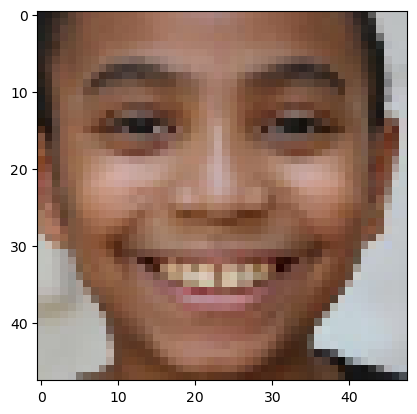

In [6]:
plt.imshow(images[87])

In [7]:
print(ages[87])

10


In [8]:
print(genders[87])

0


## Saving images array,ages array,and genders array in the system

In [9]:
images_f  = np.array(images)
ages_f    = np.array(ages)
genders_f = np.array(genders)

In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

## Finding  No. of Male and Female Samples Respectively

In [11]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


## Plotting the No of Male and Female Samples 

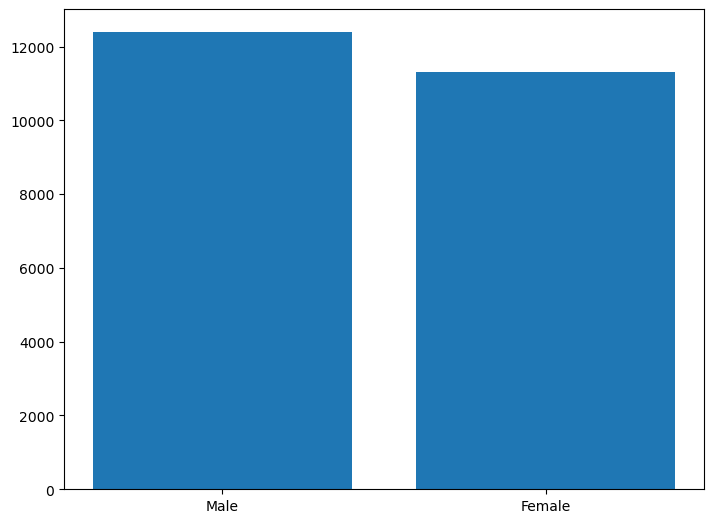

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

## Finding The No. of samples in each age

In [13]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


## Converting Age counts to lists

In [14]:
val=values.tolist()
cnt=counts.tolist()

# Plottiing The Samples Agewise

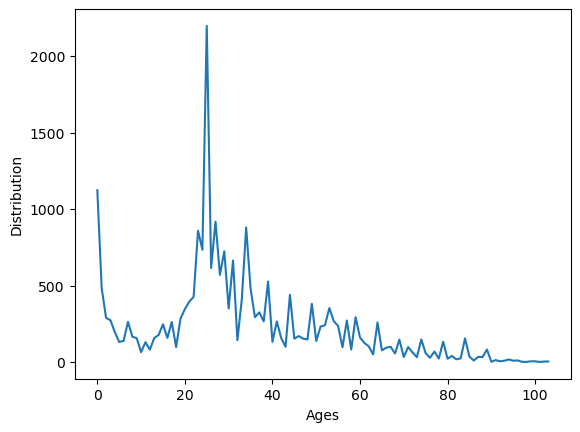

In [15]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

## Defining Labels for Output

In [16]:
labels =[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1
    
    

# Creating another list of images from existing one 
For better Learning`

In [17]:
images_f_2=images_f/255

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
labels_f=np.array(labels)

## Spliting The Dataset

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [22]:
Y_train[0:5]

array([[26,  1],
       [50,  0],
       [29,  1],
       [14,  1],
       [35,  1]])

## Splitting Y_test and Y_train further
for better understanding

In [23]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2 =[Y_test[:,1],Y_test[:,0]]

In [24]:
Y_train_2[0][0:5]

array([1, 0, 1, 1, 1])

In [25]:
Y_train_2[1][0:5]

array([26, 50, 29, 14, 35])

## Defining the model

In [56]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.0001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x
    

In [64]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0,2)(dense_1)
    drop_2=Dropout(0,2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model
    
    
    

In [65]:
model((48,48,3))

In [67]:
Model=model((48,48,3))


In [70]:
Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 48, 48, 32)           896       ['input_7[0][0]']             
                                                                                                  
 dropout_9 (Dropout)         (None, 48, 48, 32)           0         ['conv2d_7[0][0]']            
                                                                                                  
 activation_7 (Activation)   (None, 48, 48, 32)           0         ['dropout_9[0][0]']           
                                                                                            

In [71]:
from tensorflow.keras.callbacks import ModelCheckpoint

## Initializing the Model

In [73]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running the Model

In [74]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 16.3780 - sex_out_loss: 0.6621 - age_out_loss: 15.6926 - sex_out_accuracy: 0.6049 - age_out_accuracy: 0.0475
Epoch 1: val_loss improved from inf to 15.51149, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 125s 431ms/step - loss: 16.3780 - sex_out_loss: 0.6621 - age_out_loss: 15.6926 - sex_out_accuracy: 0.6049 - age_out_accuracy: 0.0475 - val_loss: 15.5115 - val_sex_out_loss: 0.5741 - val_age_out_loss: 14.9140 - val_sex_out_accuracy: 0.7091 - val_age_out_accuracy: 0.0467
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 12.3756 - sex_out_loss: 0.5296 - age_out_loss: 11.8171 - sex_out_accuracy: 0.7387 - age_out_accuracy: 0.0463
Epoch 2: val_loss improved from 15.51149 to 12.89903, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 117s 420ms/step - loss: 12.3756 - sex_out_loss: 0.5296 - age_out_loss: 11.8171 - sex_out_accuracy: 0.7387 -

Epoch 16/250
278/278 [==============================] - ETA: 0s - loss: 6.1152 - sex_out_loss: 0.2442 - age_out_loss: 5.7776 - sex_out_accuracy: 0.8935 - age_out_accuracy: 0.0475
Epoch 16: val_loss did not improve from 7.63298
278/278 [==============================] - 74s 264ms/step - loss: 6.1152 - sex_out_loss: 0.2442 - age_out_loss: 5.7776 - sex_out_accuracy: 0.8935 - age_out_accuracy: 0.0475 - val_loss: 8.6962 - val_sex_out_loss: 0.2615 - val_age_out_loss: 8.3390 - val_sex_out_accuracy: 0.8858 - val_age_out_accuracy: 0.0467
Epoch 17/250
278/278 [==============================] - ETA: 0s - loss: 5.8618 - sex_out_loss: 0.2352 - age_out_loss: 5.5289 - sex_out_accuracy: 0.8979 - age_out_accuracy: 0.0474
Epoch 17: val_loss did not improve from 7.63298
278/278 [==============================] - 72s 257ms/step - loss: 5.8618 - sex_out_loss: 0.2352 - age_out_loss: 5.5289 - sex_out_accuracy: 0.8979 - age_out_accuracy: 0.0474 - val_loss: 7.9465 - val_sex_out_loss: 0.2569 - val_age_out_loss:

278/278 [==============================] - ETA: 0s - loss: 4.6238 - sex_out_loss: 0.1862 - age_out_loss: 4.2772 - sex_out_accuracy: 0.9218 - age_out_accuracy: 0.0475
Epoch 31: val_loss did not improve from 7.17815
278/278 [==============================] - 94s 339ms/step - loss: 4.6238 - sex_out_loss: 0.1862 - age_out_loss: 4.2772 - sex_out_accuracy: 0.9218 - age_out_accuracy: 0.0475 - val_loss: 8.9834 - val_sex_out_loss: 0.2399 - val_age_out_loss: 8.5809 - val_sex_out_accuracy: 0.8974 - val_age_out_accuracy: 0.0467
Epoch 32/250
278/278 [==============================] - ETA: 0s - loss: 4.7079 - sex_out_loss: 0.1824 - age_out_loss: 4.3608 - sex_out_accuracy: 0.9231 - age_out_accuracy: 0.0475
Epoch 32: val_loss did not improve from 7.17815
278/278 [==============================] - 90s 323ms/step - loss: 4.7079 - sex_out_loss: 0.1824 - age_out_loss: 4.3608 - sex_out_accuracy: 0.9231 - age_out_accuracy: 0.0475 - val_loss: 7.7264 - val_sex_out_loss: 0.2485 - val_age_out_loss: 7.3111 - val

278/278 [==============================] - ETA: 0s - loss: 4.0225 - sex_out_loss: 0.1499 - age_out_loss: 3.6555 - sex_out_accuracy: 0.9355 - age_out_accuracy: 0.0476
Epoch 46: val_loss did not improve from 7.15201
278/278 [==============================] - 77s 278ms/step - loss: 4.0225 - sex_out_loss: 0.1499 - age_out_loss: 3.6555 - sex_out_accuracy: 0.9355 - age_out_accuracy: 0.0476 - val_loss: 7.8688 - val_sex_out_loss: 0.2631 - val_age_out_loss: 7.3870 - val_sex_out_accuracy: 0.8919 - val_age_out_accuracy: 0.0467
Epoch 47/250
278/278 [==============================] - ETA: 0s - loss: 3.9935 - sex_out_loss: 0.1502 - age_out_loss: 3.6229 - sex_out_accuracy: 0.9381 - age_out_accuracy: 0.0476
Epoch 47: val_loss did not improve from 7.15201
278/278 [==============================] - 75s 270ms/step - loss: 3.9935 - sex_out_loss: 0.1502 - age_out_loss: 3.6229 - sex_out_accuracy: 0.9381 - age_out_accuracy: 0.0476 - val_loss: 7.9938 - val_sex_out_loss: 0.2551 - val_age_out_loss: 7.5167 - val

278/278 [==============================] - 71s 254ms/step - loss: 3.6613 - sex_out_loss: 0.1208 - age_out_loss: 3.2780 - sex_out_accuracy: 0.9501 - age_out_accuracy: 0.0476 - val_loss: 7.6311 - val_sex_out_loss: 0.2723 - val_age_out_loss: 7.0948 - val_sex_out_accuracy: 0.9037 - val_age_out_accuracy: 0.0467
Epoch 62/250
278/278 [==============================] - ETA: 0s - loss: 3.6804 - sex_out_loss: 0.1224 - age_out_loss: 3.2927 - sex_out_accuracy: 0.9479 - age_out_accuracy: 0.0476
Epoch 62: val_loss did not improve from 7.15201
278/278 [==============================] - 70s 253ms/step - loss: 3.6804 - sex_out_loss: 0.1224 - age_out_loss: 3.2927 - sex_out_accuracy: 0.9479 - age_out_accuracy: 0.0476 - val_loss: 8.4100 - val_sex_out_loss: 0.2707 - val_age_out_loss: 7.8726 - val_sex_out_accuracy: 0.8964 - val_age_out_accuracy: 0.0467
Epoch 63/250
278/278 [==============================] - ETA: 0s - loss: 3.5982 - sex_out_loss: 0.1179 - age_out_loss: 3.2120 - sex_out_accuracy: 0.9521 - age

Epoch 77/250
278/278 [==============================] - ETA: 0s - loss: 3.4371 - sex_out_loss: 0.1001 - age_out_loss: 3.0316 - sex_out_accuracy: 0.9604 - age_out_accuracy: 0.0476
Epoch 77: val_loss did not improve from 7.15201
278/278 [==============================] - 65s 234ms/step - loss: 3.4371 - sex_out_loss: 0.1001 - age_out_loss: 3.0316 - sex_out_accuracy: 0.9604 - age_out_accuracy: 0.0476 - val_loss: 7.9992 - val_sex_out_loss: 0.2867 - val_age_out_loss: 7.4057 - val_sex_out_accuracy: 0.8962 - val_age_out_accuracy: 0.0467
Epoch 78/250
278/278 [==============================] - ETA: 0s - loss: 3.3610 - sex_out_loss: 0.1002 - age_out_loss: 2.9530 - sex_out_accuracy: 0.9596 - age_out_accuracy: 0.0476
Epoch 78: val_loss did not improve from 7.15201
278/278 [==============================] - 74s 265ms/step - loss: 3.3610 - sex_out_loss: 0.1002 - age_out_loss: 2.9530 - sex_out_accuracy: 0.9596 - age_out_accuracy: 0.0476 - val_loss: 8.1244 - val_sex_out_loss: 0.2846 - val_age_out_loss:

278/278 [==============================] - ETA: 0s - loss: 3.2856 - sex_out_loss: 0.0820 - age_out_loss: 2.8648 - sex_out_accuracy: 0.9665 - age_out_accuracy: 0.0476
Epoch 92: val_loss did not improve from 7.15201
278/278 [==============================] - 63s 228ms/step - loss: 3.2856 - sex_out_loss: 0.0820 - age_out_loss: 2.8648 - sex_out_accuracy: 0.9665 - age_out_accuracy: 0.0476 - val_loss: 8.5193 - val_sex_out_loss: 0.3205 - val_age_out_loss: 7.8588 - val_sex_out_accuracy: 0.8969 - val_age_out_accuracy: 0.0467
Epoch 93/250
278/278 [==============================] - ETA: 0s - loss: 3.2908 - sex_out_loss: 0.0863 - age_out_loss: 2.8637 - sex_out_accuracy: 0.9647 - age_out_accuracy: 0.0476
Epoch 93: val_loss did not improve from 7.15201
278/278 [==============================] - 63s 227ms/step - loss: 3.2908 - sex_out_loss: 0.0863 - age_out_loss: 2.8637 - sex_out_accuracy: 0.9647 - age_out_accuracy: 0.0476 - val_loss: 8.4620 - val_sex_out_loss: 0.3136 - val_age_out_loss: 7.8065 - val

278/278 [==============================] - ETA: 0s - loss: 3.0929 - sex_out_loss: 0.0727 - age_out_loss: 2.6535 - sex_out_accuracy: 0.9715 - age_out_accuracy: 0.0476
Epoch 107: val_loss did not improve from 7.15201
278/278 [==============================] - 63s 227ms/step - loss: 3.0929 - sex_out_loss: 0.0727 - age_out_loss: 2.6535 - sex_out_accuracy: 0.9715 - age_out_accuracy: 0.0476 - val_loss: 7.8119 - val_sex_out_loss: 0.3489 - val_age_out_loss: 7.0954 - val_sex_out_accuracy: 0.8971 - val_age_out_accuracy: 0.0467
Epoch 108/250
278/278 [==============================] - ETA: 0s - loss: 3.1777 - sex_out_loss: 0.0742 - age_out_loss: 2.7350 - sex_out_accuracy: 0.9699 - age_out_accuracy: 0.0476
Epoch 108: val_loss did not improve from 7.15201
278/278 [==============================] - 63s 226ms/step - loss: 3.1777 - sex_out_loss: 0.0742 - age_out_loss: 2.7350 - sex_out_accuracy: 0.9699 - age_out_accuracy: 0.0476 - val_loss: 8.0111 - val_sex_out_loss: 0.2993 - val_age_out_loss: 7.3424 - 

## Model Evaluation

In [75]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 5s 25ms/step - loss: 7.1520 - sex_out_loss: 0.2377 - age_out_loss: 6.7437 - sex_out_accuracy: 0.9016 - age_out_accuracy: 0.0467


[7.152011394500732,
 0.23774361610412598,
 6.743749618530273,
 0.9016366004943848,
 0.04673527926206589]

In [76]:
pred=Model.predict(X_test)

186/186 [==============================] - 5s 24ms/step


In [77]:
pred[1]

array([[24.271856 ],
       [ 1.4809067],
       [26.75865  ],
       ...,
       [24.144793 ],
       [63.304604 ],
       [34.244244 ]], dtype=float32)

## Plotting Loss

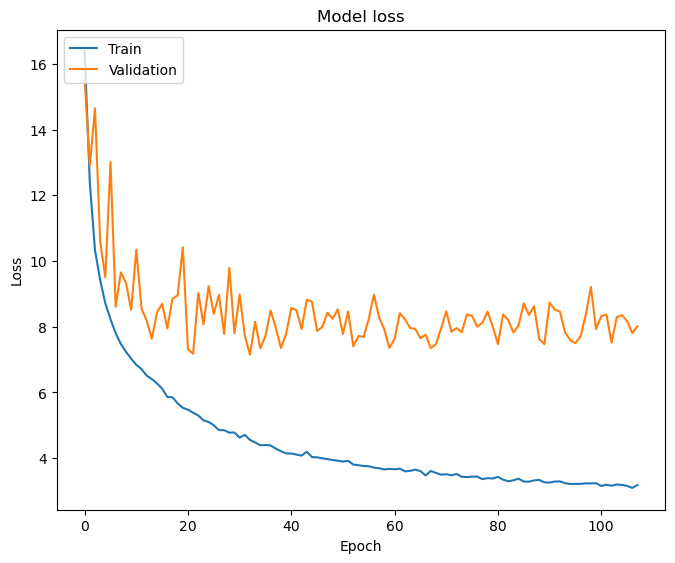

In [78]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


## Plotting Sex Accuracy

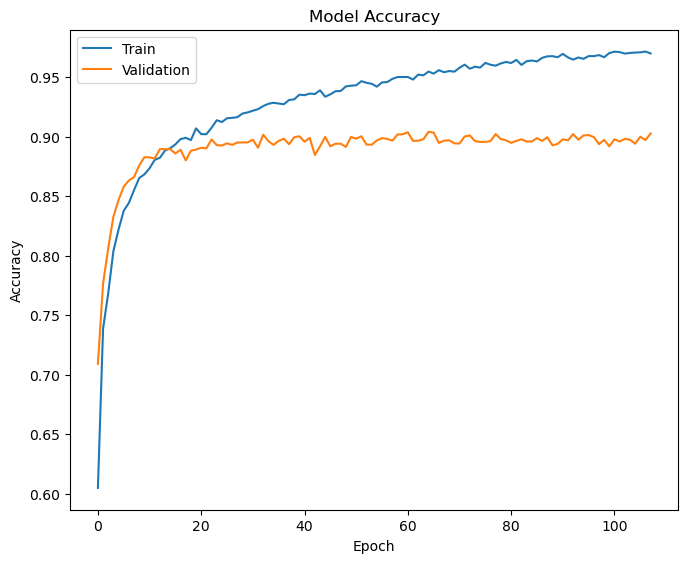

In [79]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


## Plotting Gender Accuracy

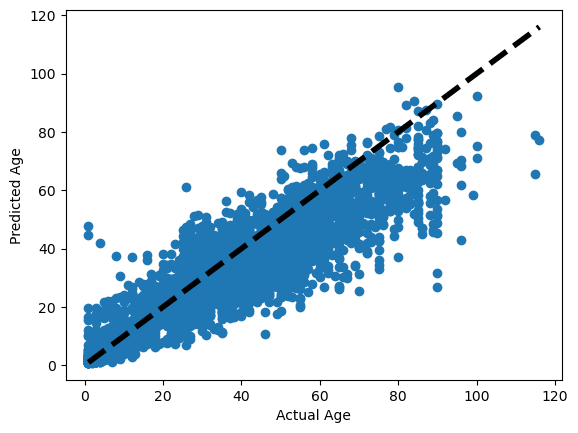

In [99]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

## Making Report of the Model (Gender Only)

In [100]:
i=0
Pred_1=[]
while(i<len(pred[0])):
    Pred_1.append(int(np.round(pred[0][i])))
    i=i+1

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [102]:
report=classification_report(Y_test_2[0],Pred_1)

In [103]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3044
           1       0.90      0.90      0.90      2883

    accuracy                           0.90      5927
   macro avg       0.90      0.90      0.90      5927
weighted avg       0.90      0.90      0.90      5927



## Making Heatmap of the Model(Gender only)

In [104]:
results=confusion_matrix(Y_test_2[0],Pred_1)

<Axes: >

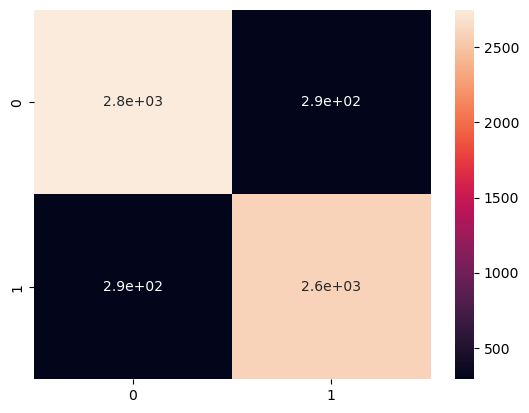

In [105]:
import seaborn as sns
sns.heatmap(results,annot=True)

## Testing The Images Ourself

In [106]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("predicted Age is :" + str(age))
    print("predicted Gender is :"+ sex_f[sex])

### Test 1

1/1 [==============================] - 0s 47ms/step
predicted Age is :90
predicted Gender is :Female


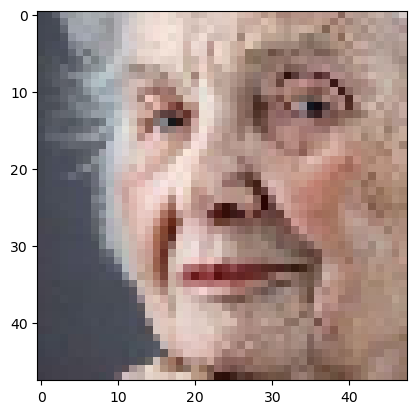

In [107]:
test_image(4,images_f,images_f_2,Model)

### Test2

1/1 [==============================] - 0s 31ms/step
predicted Age is :6
predicted Gender is :Male


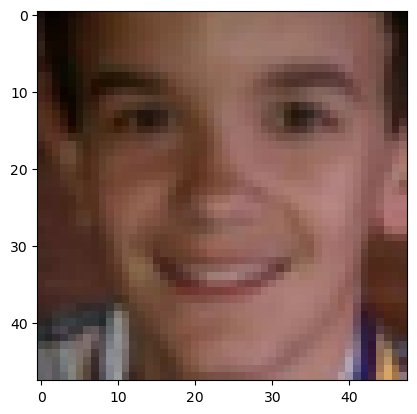

In [108]:
test_image(23,images_f,images_f_2,Model)

### Test 3

1/1 [==============================] - 0s 22ms/step
predicted Age is :11
predicted Gender is :Female


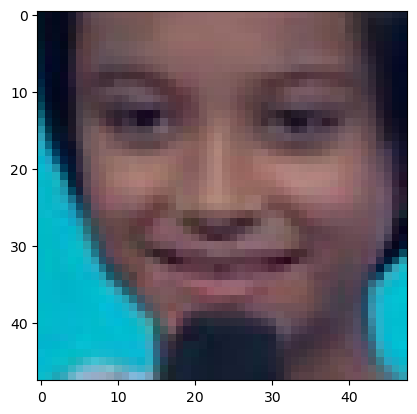

In [109]:
test_image(168,images_f,images_f_2,Model)

### Test 4

1/1 [==============================] - 0s 31ms/step
predicted Age is :23
predicted Gender is :Male


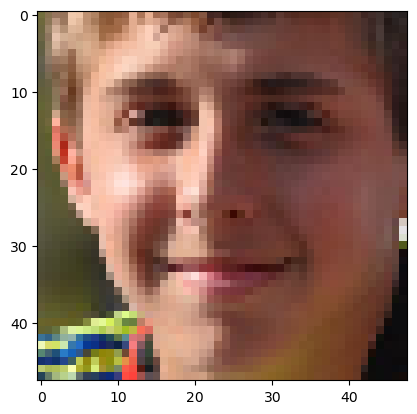

In [110]:
test_image(888,images_f,images_f_2,Model)

### Test 5

1/1 [==============================] - 0s 10ms/step
predicted Age is :18
predicted Gender is :Female


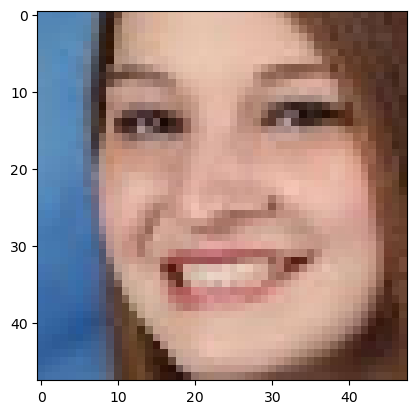

In [96]:
test_image(1288,images_f,images_f_2,Model)